# Tutorial 4: Jupyter Notebook, numpy, and plotting 

_BS1819 Data Structures and Algorithms_

_Imperial College Business School_


---
This tutorial will introduce you to the following Python concepts: _Jupyter Notebooks, Numpy and Matplotlib_.

---

This workshop will introduce to scientific computing in Python using the versatile `numpy` and `matplotlib` modules. You'll also learn how to present data in plots, and to apply some basic data analysis tools. Libraries such as these provide many more tools than we're able to cover here - essentially, for most things you can do in specialized languages such as R or MATLAB, you can also find a Python implementation. 

The workshop consists of the following parts:
1. Introduction to Jupyter Notebook
2. Numpy overview
3. Numpy and exercises
4. Introduction to plotting with matplotlib

Before jumping into scientific computing, let us introduce an important way to interact with Python.

# Jupyter Notebooks

So far we've been using the Python console and the Spyder IDE to write code. Now we'll introduce another convenient way to both write code and present it: the Jupyter Notebook. Briefly, the notebook is an interactive computing environment that allows us to include "live" Python code that the user can run, combined with explanations, narrative text, equations, etc. Notebooks can also easily be exported to html and PDF formats. Due to this flexibility, they have become popular in various contexts: for example, they are often used in analytics teams to share and present ideas. Indeed, this document and all the other tutorials have been written as Jupyter Notebooks.

The main visible component of the notebook is a web application, which is your interface with the notebook. It allows you to both create and manage documents and write and run Python code. All of this happens in your browser. The web application uses a process called Python kernel to run your code - essentially there is an IPython "shell" (resembling Spyder's console) running in the background. The documents have the extension `.ipynb`. 

The Jupyter Notebook format is not limited to Python, but can be used with other languages including R, as long as the corresponding kernel has been installed.

Jupyter Notebook comes with your Anaconda distribution. You can find it in the Anaconda Navigator. In Windows, you should also be able to find it by tapping the Windows key and starting to type Jupyter. Opening the program starts both a log window (a command line/terminal that documents what goes on in the Python kernel) and a new tab in your web browser. 

When Jupyter Notebook starts, the browser window shows a folder view, by default of the directory `C:\Users\USERNAME` in Windows, and similarly your user folder in macOS. Navigate to the directory where you saved the tutorial files in the Jupyter browser window, and open the file `tutorial_4.ipynb`. If you saved your files somewhere else (say on D: drive), please copy and paste them to within the directory. It is possible to use Jupyter Notebook in any directory, but for now, let's keep to this.


## Notebook features

When you open the file `tutorial_4.ipynb`, you'll see this same text, but below also snippets of Python code that you can run and edit. Indeed, you can also edit the entire document to make comments, add new code cells, and so on. 

### Code cells

A Jupyter notebook is organized in cells. Some cells contain text and others code snippets. You can run a cell containing Python code by selecting it and pressing the "Play" button in the toolbar above, or using `Shift + Enter` (which moves you to the next cell) or `Ctrl + Enter` (which keeps you in place). Try editing the code below and running it.

In [1]:
print('Hey!')
print(1+2)

Hey!
3


### Text cells

You can edit a text cell's contents by double-clicking on it. When you're done editing, use `Shift + Enter` to render the cell. The text cells support [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) syntax. Try editing the text in the cell below. You can add new cells using the plus icon in the toolbar above, and remove them with the scissors icon.

_ Double click to edit this cell._

**Bold text**

### A header

#### A smaller header

Some more text.

## The exam will be in Jupyter Notebook format

In the exam, you will write code in a Jupyter Notebook much like this one. We will talk more about what exactly to expect in the exam during the lectures, but in essence you'll edit code and text cells in a file like this one.

From now on, we'll provide the tutorials as Notebook files, so you'll get plenty of practice with its features. 

## Important: stopping code execution in Jupyter

Let's try running some more code in the Notebook. Run the following cell using `Shift+Enter`.

In [2]:
counter = 5
while counter >=0:
    counter = counter + 1 

KeyboardInterrupt: 

You will see that on the left hand side of the cell Jupyter displays `In[*]`. **This means that the code in the cell is still executing. While this is going on, you will not be able to run code from other cells.** 

What we've created above is an infinite loop that will never finish. The condition of the while loop will always remain `True`. **In order to stop Jupyter executing it, choose _Kernel->Interrupt_ from the menu above.**

**You may need this in the exam so make a note of this now.** Try it again a few times: run the cell and stop its execution.

# Submitting your work

After you're done with the exercises below, you'll submit the assignment to OK _directly from this Notebook_. The submission instructions are in the end of the tutorial

First, let's log into OK. To do so, run the code cell below. It will prompt you to log in.

In [5]:
# Don't change this cell; just run it. 
!pip install -U okpy
from client.api.notebook import Notebook
ok = Notebook('tut04.ok')
_ = ok.auth(inline=True)

Requirement already up-to-date: okpy in c:\users\hpeura\appdata\local\continuum\anaconda3\lib\site-packages
Requirement already up-to-date: requests==2.12.4 in c:\users\hpeura\appdata\local\continuum\anaconda3\lib\site-packages (from okpy)
Requirement already up-to-date: coverage==3.7.1 in c:\users\hpeura\appdata\local\continuum\anaconda3\lib\site-packages (from okpy)
Assignment: Tutorial 4
OK, version v1.13.4

Successfully logged in as rndmkayttis@gmail.com


## Recap

In Tutorial 3, we learned about data structures, input and output and errors. Use the command line for a short recap of what we did in the last tutorial.

### Question 1: Recap WWPD

Use the command 
```
python ok -q_recap -u
```
on the command line to start the first exercise.

# Scientific computing with numpy 

In analytics and scientific computing, we often deal with large numerical datasets. The Python community has developed a set of powerful and well-maintained libraries that build on and extend the standard functionalities and data structures of Python to make working on such problems faster and more convenient. Today we'll look at the `numpy` library. In the next tutorials, we'll learn to use pandas, which is a versatile data analysis library building on numpy's features. These are widely used tools for doing analytics using Python.

These are vast topics, so by necessity these tutorials will only provide a brief overview to them. We'll suggest additional readings in the review section.

## Why numpy?

Consider the following matrix:
$$
M = \left[
 \begin{matrix}
  1 & 2 & 3 \\
  4 & 5 & 6 \\
  7 & 8 & 9
 \end{matrix}
\right]
$$

Based on what we've learned, we could implement it in Python as a list of lists:
```python
>>> m = [[1, 2, 3],
...      [4, 5, 6],
...      [7, 8, 9]]
>>> m
[[1, 2, 3], [4, 5, 6], [7, 8, 9]]
```

Suppose we want to add 2 to every element. Ideally, we would want to do something like `m + 2`. However, if you try you will get this:
```python
>>> m + 2
---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
<ipython-input-3-d5811c0a075a> in <module>()
----> 1 m + 2

TypeError: can only concatenate list (not "int") to list
```

You can do it but it becomes more involved, not very readable and not very general either.
We could do it using nested loops or a by a list comprehension like the one below:

```python
>>> for j in range(len(m)):
...     for i in range(len(m[j])):
...         m[i][j] = m[i][j] + 2
>>> m
[[3, 4, 5], [6, 7, 8], [9, 10, 11]]
```

```python
>>> [[i + 2 for i in j] for j in m]
[[3, 4, 5], [6, 7, 8], [9, 10, 11]]
```

This is where Numpy comes in. Numpy is a library providing a powerful representation for fast manipulation of multi dimensional arrays. It is particularly useful for scientific computing and other tasks where we constantly deal with numerical data.

In brief, numpy allows us to do manipulations in a simpler way than lists, and  due to its efficient implementation, it is also much faster than using lists. 


Here's how we would calculate the squared value of integers up to 10000. The difference in speed is orders of magnitude between the two approaches (microseconds vs nanoseconds).

```ipython
In [1]: %timeit l = [i**2 for i in range(10000)]
100 loops, best of 3: 4.43 ms per loop

In [2]: import numpy as np
In [3]: %timeit l = np.arange(10000)**2
100000 loops, best of 3: 14.4 µs per loop

```

The [Scipy lectures notes](http://www.scipy-lectures.org/index.html) are a great source of information for [numpy](http://www.scipy-lectures.org/intro/numpy/array_object.html) and scientific computing with Python in general and this tutorial is largely based on them.


## Numpy overview

Let's start by loading the numpy library to make its features available to us. The convention is to import is as follows:

In [6]:
import numpy as np

We've made numpy available for our use, and given it the name `np`. This means that everytime we want to use a function in numpy we access it as `np.function`.

We can create a numpy _array_ as follows:

In [7]:
a = np.array([1, 2, 3])
print(type(a))
print(a)

<class 'numpy.ndarray'>
[1 2 3]


An array in numpy resembles a Python list in that it's an ordered sequence of elements. We can access elements just like before, however, we cannot have different kinds of data in the same array:

In [8]:
x = a[1]
a[2] = 2
print(a)
a[1] = 'Hello' # will give an error

[1 2 2]


ValueError: invalid literal for int() with base 10: 'Hello'

We could still create an array with strings alone, though:

In [9]:
string_array = np.array(['a', 'b', 'c'])

Numpy's speed comes at the cost of some flexibility here. With Python lists, we could have different data elements within a list, but data in numpy arrays must be of the same type. 

We sometimes want to move from a list to a numpy array for calculations. We can do it with the syntax `np.array(L)` where L is our list, and similarly go back.

In [10]:
L = [1, 5, 7, 9]
s = np.array(L)

new_list = list(s)

### Let's add a dimension

Suppose we want to create a matrix; ie a two-dimensional array. This is similar creating nested lists.

In [11]:
m = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

In [12]:
m

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

We can check the number of dimensions of an array by its `ndim` attribute:

In [13]:
print(a.ndim)
m.ndim

1


2

The shape attribute gives the size of each dimension as a tuple. A one-dimensional array will have just one element in the tuple, a two-dimensional one will have two.

In [14]:
print(a.shape)
m.shape

(3,)


(3, 3)

In [15]:
a.ndim

1

Try out the following commands to get a hang of how they work.

In [16]:
b = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9],
              [10, 11, 12]])

In [17]:
b.ndim

2

In [18]:
b.shape

(4, 3)

In [19]:
len(b) # size of the first dimension

4

In practice we rarely define arrays by hand. There are several convenient functions to create arrays in numpy. Here's the equivalent of `range` in `numpy`.

In [20]:
np.arange(10) # creates array with values from 0 to input 

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

We can also create an array with equally spaced numbers:

In [21]:
np.linspace(2, 20, 10)

array([  2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.])

You've seen some matrices in you maths classes. Here's one called the identity matrix which has ones on the diagonal and zeros otherwise. It is useful for many calculations. Similarly, there are functions for creating arrays filled with zeroes or ones.

In [22]:
np.eye(4)

array([[ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.]])

In [23]:
np.zeros((2, 2))

array([[ 0.,  0.],
       [ 0.,  0.]])

In [24]:
np.ones((3, 4))

array([[ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.]])

Numpy has its own of generating random numbers. Here `rand` draws uniform random numbers from $[0,1]$ in the shape of a two times three array.

In [25]:
np.random.rand(2, 3)

array([[ 0.85352219,  0.21823365,  0.56889993],
       [ 0.27434123,  0.01506832,  0.06223279]])

### Indexing and slicing

Slicing arrays shares the syntax with lists: (`array[begin:end:step]`):

In [26]:
a = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

In [27]:
a[:5] # all elements up to the fifth

array([1, 2, 3, 4, 5])

In [28]:
a[-1] # Last element@

10

In [29]:
a[5:]

array([ 6,  7,  8,  9, 10])

In [30]:
a[2:-2]

array([3, 4, 5, 6, 7, 8])

In [31]:
a[::2]

array([1, 3, 5, 7, 9])

You can also have a negative step in which case the element are read from the end:

In [32]:
a[::-1]

array([10,  9,  8,  7,  6,  5,  4,  3,  2,  1])

To index a 2-D array we need two coordinates.

In [33]:
a=np.random.rand(3, 3)

print(a)

a[1,2]

[[ 0.66924659  0.43725109  0.04920627]
 [ 0.7370366   0.65180837  0.29991987]
 [ 0.74239065  0.21931388  0.13986029]]


0.29991986616961808

However, we can also use the lists of lists syntax:

In [34]:
a[1][2]

0.29991986616961808

### Operations on numpy arrays

We now know how to create arrays in different ways. Let's continue by doing some math on numpy arrays. 

Compare how the operations work to what we've been doing with lists.

In [35]:
a = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

Most operations in numpy are by default **element-wise**, i.e. they are applied to each element of the array. This is much more convenient than looping through a list.

In [36]:
a + 2

array([[ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [37]:
a * 3

array([[ 3,  6,  9],
       [12, 15, 18],
       [21, 24, 27]])

In [38]:
a**2

array([[ 1,  4,  9],
       [16, 25, 36],
       [49, 64, 81]], dtype=int32)

In [39]:
a/2

array([[ 0.5,  1. ,  1.5],
       [ 2. ,  2.5,  3. ],
       [ 3.5,  4. ,  4.5]])

In [40]:
a+a # same as 2*a

array([[ 2,  4,  6],
       [ 8, 10, 12],
       [14, 16, 18]])

In [41]:
a*a # same as a**2

array([[ 1,  4,  9],
       [16, 25, 36],
       [49, 64, 81]])

Numpy comes in with some more complex functions built-in:

In [42]:
np.cos(a) # cosine

array([[ 0.54030231, -0.41614684, -0.9899925 ],
       [-0.65364362,  0.28366219,  0.96017029],
       [ 0.75390225, -0.14550003, -0.91113026]])

In [43]:
np.exp(a) # exponential

array([[  2.71828183e+00,   7.38905610e+00,   2.00855369e+01],
       [  5.45981500e+01,   1.48413159e+02,   4.03428793e+02],
       [  1.09663316e+03,   2.98095799e+03,   8.10308393e+03]])

In [44]:
np.exp([1, 0]) # list input is possible

array([ 2.71828183,  1.        ])

### Built-in aggregation

Once we have data in a numpy array, we can calculate statistics. Much easier than looping through (lists of) lists!

Let's start with the sum of elements of an array, either directly or by numpy's `array.sum` function:

In [45]:
b = np.array([1, 3, 5])
print(sum(b))
a = np.array([[1, 2],
              [3, 4],
              [5, 6]])
print(np.sum(a, axis=0)) # can sum along different dimensions using axis option
print(np.sum(a, axis=1))

9
[ 9 12]
[ 3  7 11]


Similarly, we can get the maximum and the minimum:

In [46]:
print([max(b) , min(b)])
print(np.max(a, axis=0)) # can max/min along different dimensions using axis option
print(np.min(a, axis=1))
a.max(0) # we can also get max directly from array along axis 0

[5, 1]
[5 6]
[1 3 5]


array([5, 6])

Numpy has a large number of these functions available, some of which are included in the following table. Most of these functions come with "NaN-safe" counterpart. A NaN-safe function can deal with missing values (which are called NaN values for "Not a Number") bye ignoring them and not returning an error.



| Function Name     | NaN-safe Version|Description|
|-------------------------------|-------------------|-------|
|np.sum	|np.nansum	|Compute sum of elements|
|np.prod|	np.nanprod	|Compute product of elements|
|np.mean|	np.nanmean	|Compute mean of elements|
|np.std	|np.nanstd	|Compute standard deviation|
|np.var|	np.nanvar	|Compute variance|
|np.min|	np.nanmin	|Find minimum value|
|np.max	|np.nanmax	|Find maximum value|
|np.argmin|	np.nanargmin|	Find index of minimum value|
|np.argmax|	np.nanargmax|	Find index of maximum value|
|np.median	|np.nanmedian|	Compute median of elements|
|np.percentile|	np.nanpercentile|	Compute rank-based statistics of elements|
|np.any	|N/A	|Evaluate whether any elements are true|
|np.all	|N/A	|Evaluate whether all elements are true|

# Numpy exercises



Now that we have seen the tools, let's see how we can apply them on financial data. 

Let's first import some data. We will import the file `stock_prices_2015.csv`. This file contains daily stock price data for Google, Amazon, Apple and Facebook for the year 2015. The format of the table is like this:


| GOOG    |         AMZN               |AAPL|FB|
|---------------|-----------------|------------------|-------|
| 524.812404   | 308.519989        |105.69862| 78.449997|
| 513.872306 | 302.190002        |102.72092|77.190002|

We'll first read the data into a numpy array. Because we can't have strings in the same array as numbers, we'll discard the headers and the timestamp that's included in the file.


> **Advanced**. Normally when reading data like this, we'd do it with the pandas library which allows us to have headers for columns and different kinds of data conveniently together. We'll upgrade to this approach in the next tutorial. Today, we'll stick with numpy.

In [47]:

# We'll read the data from the csv file using the numpy method genfromtxt
all_stock_prices = np.genfromtxt("stock_prices_2015.csv", delimiter=",", names=True) # names specifies that we have headers

all_stock_prices.shape

# We'll read the data from the csv file using the numpy method genfromtxt
all_stock_prices = np.genfromtxt("stock_prices_2015.csv", delimiter=",", skip_header=1)
all_stock_prices = all_stock_prices[:, 1:]

print(all_stock_prices[0,:]) # first stock prices of the year for the four companies

goog = all_stock_prices[:,0] # array with just Google prices
print(goog[0:10]) # print ten first prices

[ 524.812404  308.519989  105.69862    78.449997]
[ 524.812404  513.872306  501.962262  501.102268  502.682285  496.172244
  492.552239  496.182251  500.872267  501.792271]


Now we have a numpy array with the data, not including the header. The companies are ordered as in the csv file: the first column (index zero) is Google, followed by Amazon, Apple, and Facebook.

### Question 1: counts

Calculate the number of price records we have for each company. Why is the number different from 365? 

**Hint**: You can use the `array.shape` command from above to get the dimensions of an array.

In [48]:
# Change the cell so that it computes how many entries are in the csv

# your code here
a=all_stock_prices.shape[0]
number_of_entries = 252

# We've put this line in this cell so that it will print
# the value you've given to number_of_entries when you
# run it. You don't need to change this.
number_of_entries

252

In [49]:
# Test cell; please do not change!
_ = ok.grade('q1')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



### Question 2: means

What was the average stock price of Amazon during the year, rounded to an integer value?

In [50]:
# Change the cell so that it computes the average price

# Your code here
average_for_AMZN = int(np.mean(all_stock_prices[:,1]))


# We've put this line in this cell so that it will print
# the value you've given to average_for_comp2 when you
# run it.  You don't need to change this.
average_for_AMZN

478

In [51]:
# Test cell; please do not change!
_ = ok.grade('q2')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



### Question 3: returns

When comparing the performance of stock prices, analysts often look at their _returns_ over a period of time. The return is defined as the percentage change, so the return between periods $t-1$ and $t$ for stock price $p$ would be

$$
x_t = \frac{p_t - p_{t-1}}{p_{t-1}}.
$$

For example, suppose that Apple's stock price on 1 August was \$150, and on 2 August \$157. The daily return was then

$$
x = \frac{157 - 150}{150} \approx 0.047 = 4.7\%.
$$



Let's compute the daily returns for Facebook and save it in a new Numpy array. 

We are going to use this array in the next question as well.

In [52]:
# Change the cell so that it computes a Numpy array containing the daily returns for FB
# The first day's return should be zero as there is no previous value.

# Initialize an empty array for returns
fb_returns= np.zeros(number_of_entries)

# Create a loop that calculates the daily returns
# Your code here
for i in range(1, number_of_entries):
    fb_returns[i] = (all_stock_prices[i,3]/ all_stock_prices[i-1,3]) - 1


# We've put this line in this cell so that it will print
# fb_returns when you run it.  You don't need to change this.
fb_returns[0:10]

array([ 0.        , -0.01606112, -0.01347325,  0.        ,  0.02665789,
       -0.00562806, -0.01312062, -0.00351934, -0.00222365, -0.02923435])

In [53]:
# Test cell; please do not change!
_ = ok.grade('q3')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



Next calculate the returns for all the four companies. Loop through to create an array of returns corresponding to the stock prices.

In [54]:
# Change the cell so that it computes a Numpy array containing the daily returns for each company
# The first day's return should be zero as there is no previous value.

# Initialize an empty array for returns
all_returns= np.zeros(all_stock_prices.shape)

# Create a nested loop that calculates the daily returns
# Your code here
for comp_ind in range(4):
    for i in range(1, number_of_entries):
        all_returns[i, comp_ind] = (all_stock_prices[i, comp_ind]/ all_stock_prices[i-1, comp_ind]) - 1

# We've put this line in this cell so that it will print
# some elements of all_returns when you run the code. You don't need to change this.
all_returns[0:3, 3]

array([ 0.        , -0.01606112, -0.01347325])

### Question 4
Compute the highest daily returns for FB as a decimal number (where e.g. 0.10 indicates 10% return).

In [55]:
# Change the cell so that it computes the highest daily returns for FB

# Your code here

highest_FB_daily_returns = max(fb_returns)


# We've put this line in this cell so that it will print
# the value you've given to highest_daily_returns when you
# run it.  You don't need to change this.
highest_FB_daily_returns 

0.050481951807229031

In [56]:
# Test cell; please do not change!
_ = ok.grade('q4')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



### Question 5
Lastly, let's calculate the volatily for FB. Hint: you can use one of the aggregations that Numpy provides. 

In [57]:
# Change the cell so that it computes the volatility of AAPL into aapl_vol. Use the all_returns array we calculated earlier

# Your code here
fb_vol = np.std(all_returns[1:, 3])

# We've put this line in this cell so that it will print
# the value you've given to volatility when you
# run it.  You don't need to change this.
fb_vol

fb_vol

0.016173246787945232

In [58]:
# Test cell; please do not change!
_ = ok.grade('q5')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



# Plotting

Now let's see how we can plot data.

First import the plotting library, `matplotlib`:

In [59]:
import matplotlib.pyplot as plt

When we are in the Jupyter notebook, we need to use the following command to make sure the Notebook interface is able to display plots. If using matplotlib elsewhere, we don't need this command.

In [60]:
%matplotlib inline

Now let's create a first plot. We've talked about different cases of complexity in class: $O(\log n)$, $O(n)$, $O(n\log n)$, $O(n^2)$. Let's plot how quickly these functions grow with the input.

In [61]:
x = np.linspace(1, 10, 100)
x_squared = x**2
log_x = np.log(x) # natural logarithm
x_log_x = x*np.log(x)

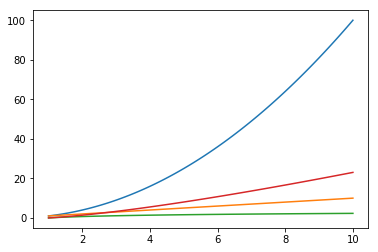

In [62]:
plt.plot(x, x_squared)
plt.plot(x, x)
plt.plot(x, log_x)
plt.plot(x, x_log_x)

Let's make it a bit more fancy by adding a legend. One way to do this is to label the plots when creating them.

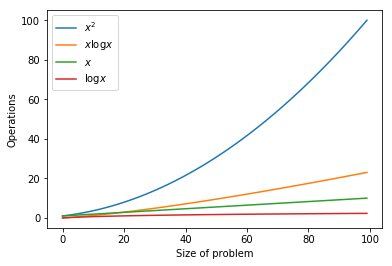

In [63]:
# Give each curve a variable names and a label which we can refer to later
x_squared_plot, = plt.plot(x_squared, label='$x^2$') # The dollar signs make math appear fancy through LaTeX
x_log_x_plot, = plt.plot(x_log_x, label='$x\log x$')
x_plot, = plt.plot(x, label='$x$')
log_x_plot, = plt.plot(log_x, label='$\log x$')

# Give the plot variables as "handles" so matplotlib uses labels as legend entries
plt.legend(handles=[x_squared_plot, x_log_x_plot, x_plot, log_x_plot]) 

# Labels on axis
plt.xlabel("Size of problem")
plt.ylabel("Operations")

Another common type of a plot is a scatterplot. Here we plot some random numbers:

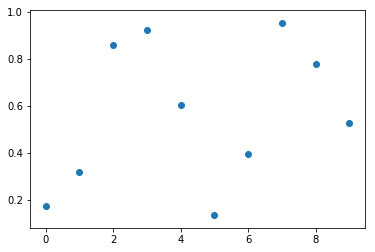

In [64]:
x = np.arange(10)
y = np.random.rand(10)
plt.scatter(x, y) # Scatter plot

Now let's plot some of our  stock price data. Below is a plot of Google's price in red. Try changing the colours. 
Here are some colours we can use through letter notation.

b : blue; g : green; r : red; c : cyan; m : magenta; y : yellow; k : black; w : white.

In [65]:
plt.plot(all_stock_prices[:,0], 'r') # plot the stock price for GOOG specifying color 'r'

NameError: name 'table_of_stock_prices' is not defined

Next, let's plot the prices of GOOG and AMZN together, in order to compare them.

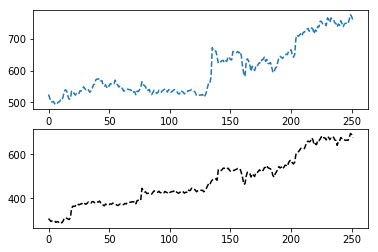

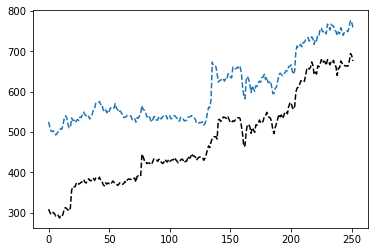

In [72]:
plt.figure(1) # First figure: plot separately as subplots
plt.subplot(2, 1, 1) # Notation: (rows, columns, position)
plt.plot(all_stock_prices[:,0], '--') # specify dashed line

plt.subplot(2, 1, 2) # Notation: (rows, columns, position)
plt.plot(all_stock_prices[:,1], 'k--') # specify black dashed line

plt.figure(2) # Second figure: plot together
plt.plot(all_stock_prices[:,0], '--') # specify dashed line
plt.plot(all_stock_prices[:,1], 'k--') # specify black dashed line

We can also have them in the same plot. Let's plot the _normalized_ prices for all the companies together.

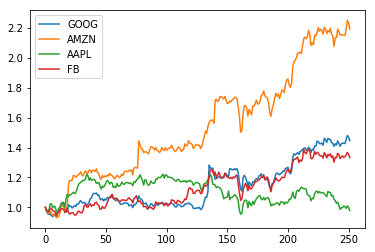

In [71]:
# If we don't specify colors, the color scheme is default which looks pretty nice
plt.plot(all_stock_prices[:,0]/all_stock_prices[0,0])
plt.plot(all_stock_prices[:,1]/all_stock_prices[0,1])
plt.plot(all_stock_prices[:,2]/all_stock_prices[0,2])
plt.plot(all_stock_prices[:,3]/all_stock_prices[0,3])
plt.legend(['GOOG', 'AMZN', 'AAPL', 'FB'])

Let's look at returns again. How are they distributed?

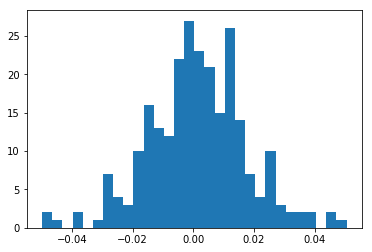

In [68]:
# Facebook returns histogram
fb_hist = plt.hist(fb_returns, 30) # 30 bins

**Exercise.** (No test for this exercise). Create the same histogram plot for the other stocks.


## All done!

### Important!

Before you leave the tutorial, run this final cell to submit your work.

In [73]:
_ = ok.submit()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Could not save your notebook. Make sure your notebook is saved before sending it to OK!
Submit... 100% complete
Submission successful for user: rndmkayttis@gmail.com
URL: https://okpy.org/icbs/bs1819/au17/tut04/submissions/BBY55n



## Review

This has been a quick overview of numpy and matplotlib. Next time we'll continue to pandas which provides more convenient tools to deal with data from different sources. 

There are many great resources online for learning more matplotlib and numpy:
- The SciPy lecture notes, which this tutorial is partly based on: http://www.scipy-lectures.org/
- Matplotlib tutorials: https://matplotlib.org/users/tutorials.html - see also the examples gallery on the website
- The Python Data Science Handbook https://github.com/jakevdp/PythonDataScienceHandbook
- If you're coming from MATLAB, Numpy for MATLAB users: https://docs.scipy.org/doc/numpy-dev/user/numpy-for-matlab-users.html

### Extra topic: Price simulation

When analysing portfolio risk, we often want to run simulations on stock prices. 

Facebook's returns above look like they might be normally distributed. Let's assume they are, and simulate how they might change over the next year if they behaved similarly. First, we calculate the mean and the standard deviation of the returns.

In [ ]:
fb_mean = fb_returns.mean()
fb_std = fb_returns.std()

fb_mean, fb_std

Next, let's generate random numbers from the normal distribution with these parameters. These are possible random daily returns that could happen if the future returns were similar to past ones.

In [ ]:
# Create 100 year-long (252 day) simulations
sampling_period = 252
no_draws = 100

random_draw = np.random.normal(fb_mean, fb_std, (sampling_period, no_draws)) 

random_draw[0:10, 1]

In [ ]:
# Calculate cumulative return of simulation during year
c = np.cumprod(random_draw + 1, axis=0)

In [ ]:
plot_range = range(sampling_period) # Get x axis for graph

for i in range(c.shape[1]):
    plt.plot(plot_range, c[:,i])

plt.show()

The pattern is upwards as FB went up by a lot during the year. Historical data is not a predictor of future performance, but it may be valuable in assessing the risk of investments. This simulation is furthermore naive in that it doesn't take into account factors like autocorrelation in returns but assumes independent returns every day. A more sophisticated time-series analysis would be required for better calibration of the simulation model. 